In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from google.genai import types
safety_settings = [
    types.SafetySetting(
        category="HARM_CATEGORY_DANGEROUS_CONTENT",
        threshold="BLOCK_ONLY_HIGH",
    ),
]

## One-shot classification

### Closed source model (Google Gemini)

In [3]:
import os

google_api_key = os.environ.get('GOOGLE_API_KEY')

from google import genai
client = genai.Client(api_key=google_api_key)

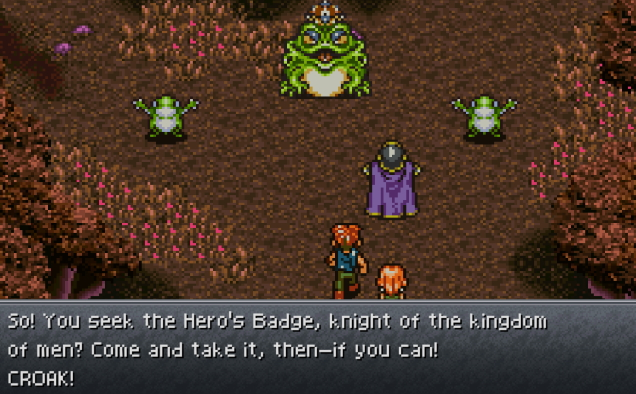

In [4]:
from PIL import Image
from IPython.display import display

ocr_image_path = 'C:/Users/marti/Desktop/presentations/multimodal/assets/ocr_example.jpg'

img = Image.open(ocr_image_path)   # change to your image file
display(img)

In [5]:
client = genai.Client(api_key=google_api_key)

ocr_file = client.files.upload(file=ocr_image_path)

## Bounding boxes with labels

In [6]:
from utils import plot_bounding_boxes

```json
[
  {"box_2d": [10, 431, 252, 576], "mask": "", "label": "the large frog with a crown"},
  {"box_2d": [232, 203, 355, 303], "mask": "", "label": "the small frog on the left"},
  {"box_2d": [232, 707, 355, 807], "mask": "", "label": "the small frog on the right"}
]
```

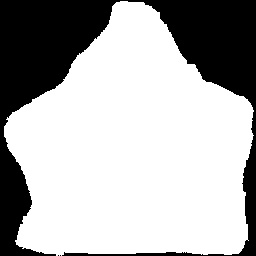
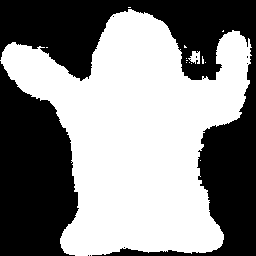
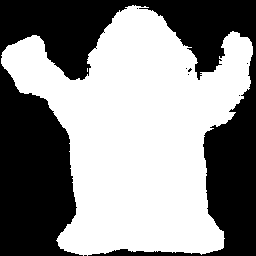

In [7]:
prompt = "Give the segmentation masks for the frogs in the picture."

# Run model to find segmentation masks
response = client.models.generate_content(
    model='gemini-2.5-flash-preview-05-20',
    contents=[prompt, ocr_file],
    config = types.GenerateContentConfig(
        temperature=0.5,
        safety_settings=safety_settings,
    )
)

# Check output
print(response.text)

(636, 394)


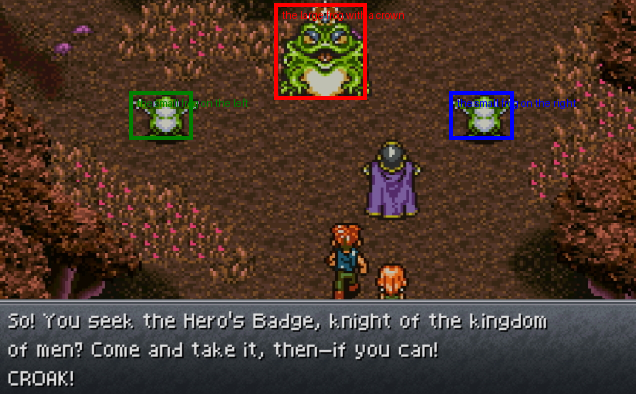

In [8]:
plot_bounding_boxes(img, response.text)